In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
df_eu_mo = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_monthly')
df_am_mo = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_monthly')

In [4]:
df_eu_yr = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_yearly')
df_am_yr = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_yearly')

In [25]:
df_eu_mar = df_eu_mo[df_eu_mo.index.month == 3]
df_am_mar = df_am_mo[df_am_mo.index.month == 3]

df_eu_sept = df_eu_mo[df_eu_mo.index.month == 9]
df_am_sept = df_am_mo[df_am_mo.index.month == 9]

df_eu_yearlymean = df_eu_mo.resample('YS').mean()
df_am_yearlymean = df_am_mo.resample('YS').mean()

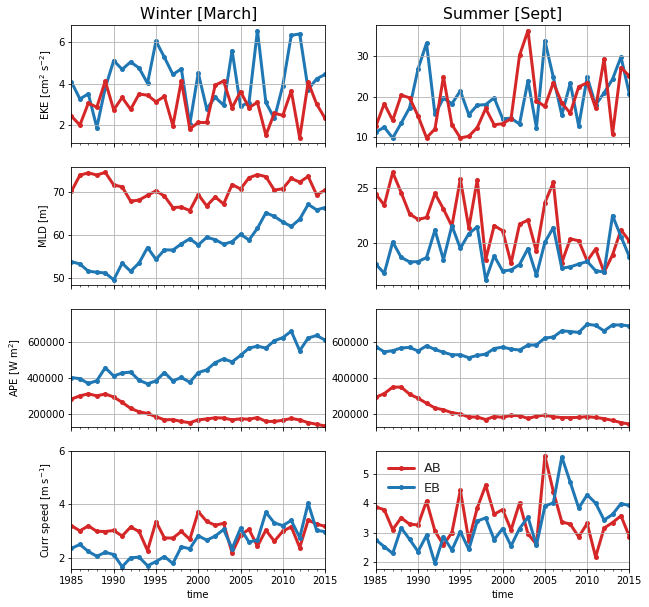

In [6]:
figsize = (10, 10)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.style.use('seaborn')
plt.style.use('seaborn-talk')

df_eu_mar['EKE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_am_mar['EKE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =2)
ax1.set_ylabel('EKE [cm$^{2}$ s$^{-2}$]')
ax1.set_title('Winter [March]')
df_eu_sept['EKE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_am_sept['EKE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:red', zorder =2)
ax2.set_title('Summer [Sept]')

df_eu_mar['MLD'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:red', zorder =1)
df_am_mar['MLD'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:blue', zorder =2)
ax3.set_ylabel('MLD [m]')
df_eu_sept['MLD'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:red', zorder =1)
df_am_sept['MLD'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:blue', zorder =2)

df_eu_yr['WAPE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:red', zorder =1)
df_am_yr['WAPE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:blue', zorder =2)
ax5.set_ylabel('APE [W m$^{2}$]')
df_eu_yr['SAPE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:red', zorder =1)
df_am_yr['SAPE'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:blue', zorder =2)
ax5.set_ylim(130000,780000)
ax6.set_ylim(130000,780000)

df_eu_mar['cur50m'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:red', zorder =1)
df_am_mar['cur50m'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:blue', zorder =2)
ax7.set_ylabel('Curr speed [m s$^{-1}$]')
df_eu_sept['cur50m'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:red', zorder =1)
df_am_sept['cur50m'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:blue', zorder =2)
ax7.set_ylim(1.6,6)
ax7.set_ylim(1.6,6)

plt.legend({'EB','AB'})
# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

plt.savefig(save_path+'FIG5.png', dpi = 300, bbox_inches='tight') 

In [42]:
# df_eu_yr['SHLD'].plot()
# df_eu_yr['WHLD'].plot()
# df_am_yr['SHLD'].plot()
# df_am_yr['WHLD'].plot()
# plt.legend()

In [43]:
# first_year = 1985
# last_year  = 2015
# years      = np.arange(first_year,last_year+1,1)
# x = df_eu_yr['WHLD'].values-df_eu_mar['MLD'].values # winter
# y = df_eu_yr['SHLD'].values-df_eu_sept['MLD'].values # summer 

# z = df_am_yr['WHLD'].values-df_am_mar['MLD'].values # winter
# w = df_am_yr['SHLD'].values-df_am_sept['MLD'].values # summer 

# plt.plot(years,x, label = 'EU winter')
# plt.plot(years,y, label = 'EU summer')

# plt.plot(years,z, label = 'AM winter')
# plt.plot(years,w, label = 'AM summer')

# # plt.plot(x)
# plt.legend()

In [44]:
df_eu_yr.head()

,ANPP,WAPE,WHLD,SAPE,SHLD
time,,,,,
1985-01-01,1.381640,283849.388690,194.579658,293639.438901,195.676621
1986-01-01,0.551628,301062.230461,197.212659,313750.242259,200.452214
1987-01-01,1.840164,312597.330771,199.994688,349258.790898,215.507478
1988-01-01,2.783377,301145.160846,193.549990,349324.106869,214.285340
1989-01-01,5.773094,311707.830309,198.166148,310567.391861,198.598992
